# Import Libraries

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [4]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df_combined.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401


In [5]:
df = df_combined.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310586 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401


In [6]:
df.shape

(7855402, 11)

# Convert date to datetime 

In [7]:
%%time
fmt = '%m/%d/%Y %I:%M:%S %p'
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310586 to 13152172
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 674.2+ MB
CPU times: total: 31.2 s
Wall time: 31.3 s


,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
ID,,,,,,,,,,,,
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856,2001-01-01 01:00:00
1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996,2001-01-01 13:00:00


## Set Datetime as Index

In [8]:
# set Datetime as Index
df = df.set_index('Datetime')
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7855402 entries, 2001-01-01 01:00:00 to 2023-07-25 00:59:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


In [10]:
df.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               ...
               '2023-07-25 12:46:00', '2023-07-25 00:46:00',
               '2023-07-25 12:46:00', '2023-07-25 12:49:00',
               '2023-07-25 00:50:00', '2023-07-25 12:50:00',
               '2023-07-25 00:50:00', '2023-07-25 12:51:00',
               '2023-07-25 12:53:00', '2023-07-25 00:59:00'],
              dtype='datetime64[ns]', name='Datetime', length=7855402, freq=None)

## Drop Unecessary Columns

In [11]:
# drop unecessary columns
#df.drop(columns=['Latitude', 'Longitude', 'Date'], inplace=True)
#df.head(2)

## Checking for Missing Values

In [12]:
##check nulls before coercing errors
df.isna().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description     10810
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 88258
Longitude                88258
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7855402 entries, 2001-01-01 01:00:00 to 2023-07-25 00:59:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


In [14]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401


# Stakeholder Questions to Answer

## Question 1: Comparing Police Districts: Which district has the most crimes? Which has the least?

In [15]:
df['District'].value_counts()

8.0     527625
11.0    503791
6.0     459446
7.0     453430
25.0    446658
4.0     446049
3.0     398385
12.0    389772
9.0     383557
2.0     372217
19.0    353148
18.0    352735
5.0     347809
10.0    338494
15.0    336085
1.0     318353
14.0    303754
16.0    263114
22.0    257351
24.0    237564
17.0    226698
20.0    139070
31.0       246
21.0         4
Name: District, dtype: int64

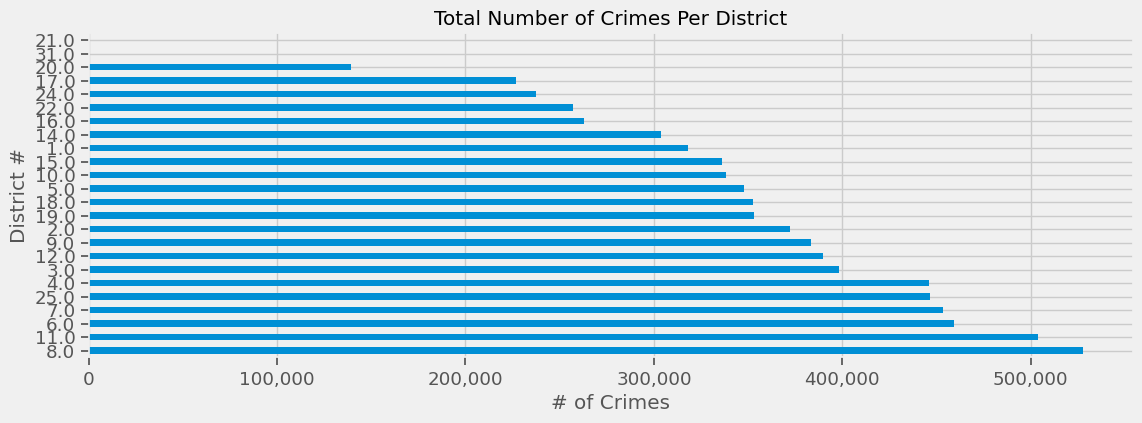

In [16]:
# Sort the dataframe by the value counts of the 'District' column in ascending order
sorted_df = df['District'].value_counts().sort_values(ascending=True)

# Plotting the sorted value counts by the district
ax = sorted_df.plot(kind='barh', xlabel='# of Crimes', ylabel='District #',
                   title='Total Number of Crimes Per District')

# Formatting x-axis labels with commas every 3 numbers
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Reverse the y-axis to have the lowest district at the top
ax.invert_yaxis()


- District 8 has the most crimes at 527625
- District 21 has the least crimes at 4

## Question 2) Crimes Across the Years:
   - Is the total number of crimes increasing or decreasing across the years?
   - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [17]:
## feature engineering for dates
df['Year'] = df['Datetime'].dt.year
df.head()

KeyError: 'Datetime'

In [ ]:
# Resample the data yearly and count the number of crimes for each year
df_yearly_crime = df.resample("Y").size().interpolate()

In [ ]:
df_yearly_crime.isna().sum()

In [ ]:
# Plot total crimes across years
df_yearly_crime.plot(kind='line', title='Total Number of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('# of Crimes')
plt.show()

In [ ]:
df_yearly_crime

In [ ]:

a = sns.catplot(data=df_yearly_crime, x='Year', y='# of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2, aspect=2,
            height=4,kind='point',sharey=False)
plt.xticks(np.arange(0,23, step=2));

In [ ]:
# Group data by crime type and year and count occurrences
crime_by_year = df.dropna().copy #drop null values
crime_by_year = df.groupby([df.index.year, 'Primary Type']).size().unstack()

# Plot the data
crime_by_year.plot(kind='line', subplots=True, layout=(-1, 3), figsize=(15, 50)) 
#fig.suptitle('Yearly Number of Crimes by Type')
plt.tight_layout()
plt.show()

- Overall crime is decreasing, but it appears that Non-Criminal (subject specified) is doing the opposite and has a large upwards spike.

## Question 3) Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [ ]:
df['Month'] = df['Datetime'].dt.month_name()
df['Day of Month'] = df['Datetime'].dt.day
df.head(2)

In [ ]:
## make df that is resampled to correct freq
df_crime = df.resample("M").size()
df_crime

In [ ]:
## get the date of the max crimes
date_most_crimes = df_crime.idxmax()
date_most_crimes

In [ ]:
## get the date of the min crimes
date_min_crimes = df_crime.idxmin()
date_min_crimes

In [ ]:
# how many crimes at least?
least_crimes_count = df_crime.loc[date_min_crimes]

In [ ]:
# how many crimes at most?
most_crimes_count = df_crime.loc[date_most_crimes]

In [ ]:
# Print the months with the most and least crimes
print("Months with the most crime:")
print(date_most_crimes)
print("Months with the least crime:")
print(date_min_crimes)

In [ ]:
# Plot the df and add vertical line at month with most crimes
ax = df_crime.plot()
ax.axvline(date_most_crimes, color='red', label=f'Most Crimes ({most_crimes_count} crimes)')
ax.axvline(date_min_crimes, color='blue', label=f'Least Crimes ({least_crimes_count} crimes)')

# Display the legend
ax.legend()

# Show the plot
plt.show()

## Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?

In [ ]:
# !pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

In [ ]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

In [ ]:
## create a test holiday 
test = "01/01/2015"
test

In [ ]:
## test the api 
us_holidays.get(test)

In [ ]:
df.info()

In [ ]:
## Saving both holiday types as columns
df["US Holiday"] = df['Date'].map(us_holidays.get)
df